In [1]:
## Today we will take a look at Classification problem 
## with the help of Neural Network
import torch

In [2]:
## typical plan for this notebook
## Architecture of NN tailormade for Classification task
## Preparing the Classification data
## Building the classification model
## Fitting / training
## Inference/ predicting
## Improving the model 
## Adding Non-Linearity
## Replicating the above 
## Bleanding all the above together


In [3]:
## Architecture of NN for Classification Task
## Blueprint
## InputLayer -> HiddenLayer(s) -> output layers
## number of neurons per layer
## activation function in the hidden layer[ReLU etc.]
## activation in O/p layer[softmax etc.]
## Loss Function[Binary cross entropy]
## Optimizer[SGD / Adam]
##

In [4]:
## So first we prepare the classification data[Data is Modern day OIL]
## we'll use Scikit learn library
from sklearn.datasets import make_circles
n_samples = 1000 ## around 1K data points
## creating a circle
X,y = make_circles(n_samples, noise=0.07, random_state=42)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
print(f"First 5 X features :\n {X[:5]}")
print(f"\n First 5 y labels:\n {y[:5]}")

First 5 X features :
 [[ 0.7301675   0.26189078]
 [-0.71190572  0.1841244 ]
 [-0.8443255   0.27063595]
 [-0.46454046  0.65157761]
 [ 0.44899682 -0.89314768]]

 First 5 y labels:
 [1 1 1 1 0]


In [6]:
## two coordinates (x,y) and one label for them
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0], "X2":X[:,1],"labels":y})
circles.head(10)

,X1,X2,labels
0,0.730168,0.261891,1
1,-0.711906,0.184124,1
2,-0.844325,0.270636,1
3,-0.464540,0.651578,1
4,0.448997,-0.893148,0
5,-0.460125,0.739640,1
6,-0.018442,0.807898,1
7,0.747733,0.171293,1
8,-0.182061,-0.806218,1
9,-0.099746,1.062906,0


In [7]:
## checking the different labels
circles.labels.value_counts()

1    500
0    500
Name: labels, dtype: int64

**Looks like a perfectly balanced dataset**

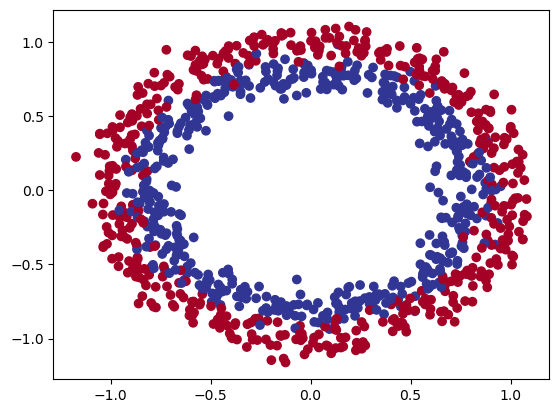

In [8]:
## Plotting them to see 
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1], c = y, cmap=plt.cm.RdYlBu)

In [9]:
## now the task remain to separate them aka classify them

X[0].shape, y[0].shape

((2,), ())

**Two dimension for X and 1 for y**

In [10]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [11]:
## second task is to convert the data into tensors
import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
X[:5], y[:5]

(tensor([[ 0.7302,  0.2619],
         [-0.7119,  0.1841],
         [-0.8443,  0.2706],
         [-0.4645,  0.6516],
         [ 0.4490, -0.8931]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
## Its time to split the dataset into train/test set
## instead of manually spliting them like we did before 
## this time we'll use scikit learn lib
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)



(800, 200, 800, 200)

In [13]:
## parfait tres bien 
## Now lets build our classifier model
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
## Since we have data and as well as their label
## this approach of building model
## falls under the category of Supervised Learning
## since label is supervising the model as to classify the
## input data



class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)
        
    def forward(self,x):
        tmp = self.layer1(x)
        return self.layer2(tmp)

model = CircleModel().to(device)
model

CircleModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

** This time we created two layers for our task, since hidden layer aids in our learning process, beacuase model learns from 5(in our case for hidden layer) instead from 2 thereby leading multiple points in defining the output. This may/ may not work from time to time, for that purpose to reassure that hidden layer improves the model's decision making capability we'll test it against a model with no hidden layer and compare the outcomes.
!!!  NOTE:: Just because you can use DL doesn't mean you should !!!!!
**

In [15]:
class circleModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer = nn.Linear(in_features=2, out_features=1)
    def forward(self,x):
        return self.layer(x)
model_1 = circleModel().to(device)
model_1

circleModel(
  (layer): Linear(in_features=2, out_features=1, bias=True)
)

**No of hidden layer -> Hyperparameters**
****

In [16]:
## another way to do the above .....
model_2 = nn.Sequential(nn.Linear(in_features=2, out_features=5),
                      nn.Linear(in_features =5, out_features=1)).to(device)
model_2

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
false_pred = model(X_test.to(device))
print(len(false_pred), false_pred.shape)
# false_pred

200 torch.Size([200, 1])


In [18]:
## now lets setup our loss function
## note how we used MAE for Regression problem since we want preedict some value(close to desirede result)
## in this classification  problem we are going to use a loss function helpful for this kind of problem
## We're going to use Binary Cross Entropy loss
## while keeping the optimizer the same

loss_fn = nn.BCEWithLogitsLoss()## BCEWithLogitsLoss = BCELoss + Sigmoid
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)



In [19]:
## up until now we've used no metrics for monitoring the loss
## a generic way to do so was to look up the losses
## and infer whether the model was doing good or not
## now we'll use a custom metrics that is more appealing
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/(len(y_pred)))*100
    return acc


In [20]:
## we now head towards training of the model
## You know it don't you
## Forward pass -> calc Loss -> Zero_grad -> backprop -> update_optimizer
## but before that.....
## we need to look what the o/p format of our model
y_logits = model(X_test.to(device))[:5]
y_logits

tensor([[0.1023],
        [0.0385],
        [0.1625],
        [0.0791],
        [0.0379]], device='cuda:0', grad_fn=<SliceBackward0>)

In [21]:
## So its a 2D tensors...
## Y=MX+C i.e. Y is the 2D tensor
## raw output ~ logits
## Sometimes these logits are hard to comprehend so we're going to use
## a form of activation function to get o/p somewhat interpretable
y_preds_prob = torch.sigmoid(y_logits)
y_preds_prob

tensor([[0.5255],
        [0.5096],
        [0.5405],
        [0.5198],
        [0.5095]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [22]:
## if o/p >= 0.5 -> class -1 else class -> 0
## basically we're transforming prediction prob into prediction labels
## these values serves as a decision boundaries ##
## that is it gives a slight peek into what the model is thinking
## see the below flow of control


## find out the predicted labels and round them up
y_preds = torch.round(y_preds_prob)
## 5 of those labels
y_pred_labels = torch.round(torch.sigmoid(model(X_test.to(device))[:5]))
print(y_pred_labels)

## checking if they are equal to the actual predicted labels
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

## get rid of the extra dimension
y_preds.squeeze()


tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)
tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [23]:
y_preds.ndim, y_test[:5]

(2, tensor([1., 0., 1., 0., 1.]))

**nn.BCELoss() works with / needs torch.sigmoid
**

**using nn.BCEWithLogitsLoss works with raw logits
**

In [24]:
## Lets get the training started
torch.manual_seed(42)

## Set Epochs to 100
epochs = 100

## Put the data in the GPU
X_train , y_train = X_train.to(device), y_train.to(device)
X_test , y_test = X_test.to(device), y_test.to(device)



## Build the training loop and evaluation loop
for epoch in range(epochs):
    
    ## train
    model.train()
    
    ## Forward pass
    y_logits = model(X_train).squeeze() ## squeeze to remove the extra dim
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    
    ## Calc the losss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
    
    ## Setting optimizer tot zero
    optimizer.zero_grad()
    
    ## loss backward
    loss.backward()
    
    ## update the optimizer
    optimizer.step()
    
    
    ## Testing time 
    model.eval()
    
    with torch.inference_mode():
        ## forward pass
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        ## calculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)
        
    ## print out the loss
    if epoch%10==0:
        print(f"Epoch_ {epoch} || train_loss_ {loss} || accuracy_ {acc}")
        
    
    

Epoch_ 0 || train_loss_ 0.6949952244758606 || accuracy_ 52.0
Epoch_ 10 || train_loss_ 0.6949119567871094 || accuracy_ 51.5
Epoch_ 20 || train_loss_ 0.6948348879814148 || accuracy_ 50.875
Epoch_ 30 || train_loss_ 0.6947635412216187 || accuracy_ 51.37500000000001
Epoch_ 40 || train_loss_ 0.694697380065918 || accuracy_ 51.24999999999999
Epoch_ 50 || train_loss_ 0.6946360468864441 || accuracy_ 51.37500000000001
Epoch_ 60 || train_loss_ 0.6945789456367493 || accuracy_ 51.87500000000001
Epoch_ 70 || train_loss_ 0.6945256590843201 || accuracy_ 51.87500000000001
Epoch_ 80 || train_loss_ 0.6944759488105774 || accuracy_ 51.74999999999999
Epoch_ 90 || train_loss_ 0.6944292783737183 || accuracy_ 51.37500000000001


In [25]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

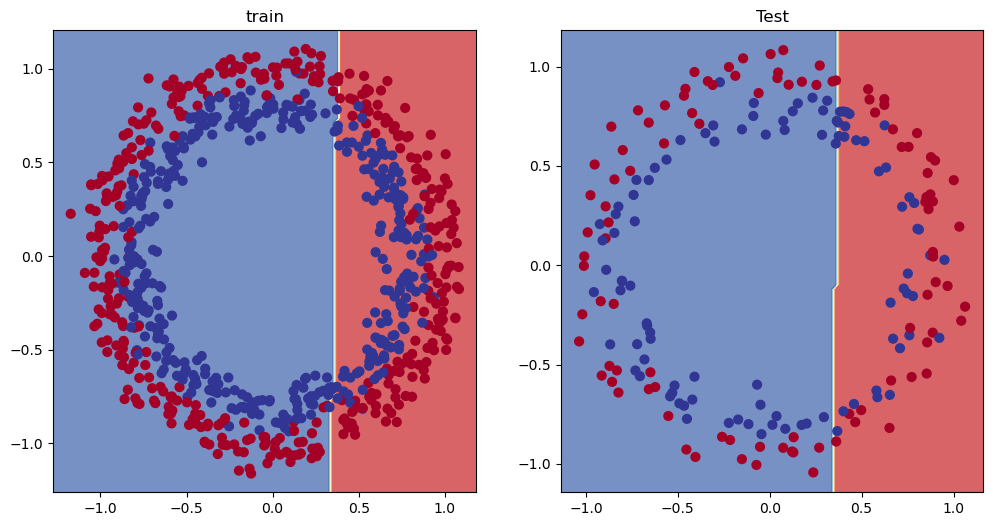

In [26]:
## lets visualize with the above downloaded modules
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [27]:
## what a bad accuracy and the inference
## Its time to improve the model
## so the next question is what is the  scope of improvement
## Add more layers
## Add more hidden units
## training longer 
## changing the activation function
## Changing the lr
## change the loss function
## or use the Transfer learning
## The above mentioned steps are the part of the hyperparameter tuning
## Lets do all the mention things at once


## creating the new model
class CircleModel_V1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer3 = nn.Linear(in_features = 10, out_features = 1)
        
    def forward(self,x):
        return self.layer3(self.layer2(self.layer1(x)))


model_v1 = CircleModel_V1().to(device)
model_v1





CircleModel_V1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [28]:
## time for revamping the loss function
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_v1.parameters(), lr = 0.1)


In [29]:
## lets train a little longer
torch.manual_seed(42)
epochs = 2000
## put the data into GPUs
X_train , y_train = X_train.to(device),y_train.to(device)
X_test , y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
    ## training
    model_v1.train()
    ## forward pass
    y_logits = model_v1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) ## turning logits into predictions
    
    ## calc loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
    
    ## setting the optimizer to zero
    optimizer.zero_grad()
    
    ## loss backwards
    loss.backward()
    
    ## updating the step
    optimizer.step()
    
    ## testing
    model_v1.eval()
    with torch.inference_mode():
        ## forward pass
        test_logits = model_v1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        ## calc loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred=test_pred)
        
    ## print out the results
    if epoch%10==0:
        print(f"Epochs _{epoch}|| Loss_ {loss} || accuracy_{acc}")
        
        
    
    




Epochs _0|| Loss_ 0.6939062476158142 || accuracy_51.125
Epochs _10|| Loss_ 0.6936525702476501 || accuracy_50.24999999999999
Epochs _20|| Loss_ 0.6934863328933716 || accuracy_50.74999999999999
Epochs _30|| Loss_ 0.693367063999176 || accuracy_50.625
Epochs _40|| Loss_ 0.6932781338691711 || accuracy_50.375
Epochs _50|| Loss_ 0.6932107210159302 || accuracy_50.0
Epochs _60|| Loss_ 0.6931592226028442 || accuracy_49.5
Epochs _70|| Loss_ 0.6931198239326477 || accuracy_49.0
Epochs _80|| Loss_ 0.6930893659591675 || accuracy_50.0
Epochs _90|| Loss_ 0.693065881729126 || accuracy_51.0
Epochs _100|| Loss_ 0.6930477023124695 || accuracy_50.625
Epochs _110|| Loss_ 0.6930335760116577 || accuracy_50.24999999999999
Epochs _120|| Loss_ 0.6930226683616638 || accuracy_51.125
Epochs _130|| Loss_ 0.6930141448974609 || accuracy_50.625
Epochs _140|| Loss_ 0.6930074691772461 || accuracy_50.625
Epochs _150|| Loss_ 0.6930022835731506 || accuracy_50.24999999999999
Epochs _160|| Loss_ 0.6929981708526611 || accuracy_

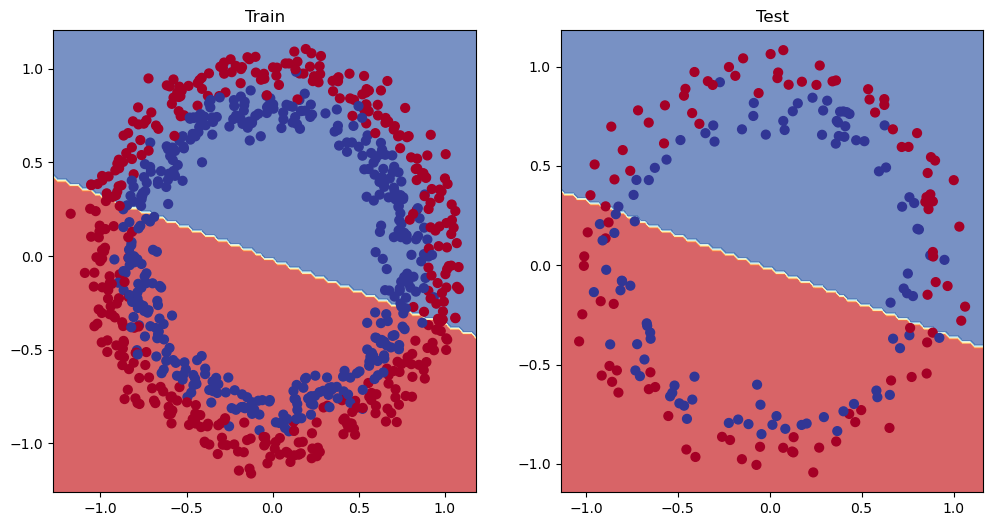

In [30]:
## seems like it was a waste of an effort 
## anyway lets plot and visualize 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_v1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_v1, X_test, y_test)

In [31]:
## Better than the previous but not upto the mark
## Its drawing the straight line meaning its classification 
## is linear in nature i.e. it is well capable of capturing the linear data

## lets check that hypothesis
weight=0.7
bias = 0.3
start = 0
end = 1
step = 0.01

## creating data
X_regression = torch.arange(start, end ,step).unsqueeze(dim=1)
y_regression = weight* X_regression + bias

## check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [32]:
## create train test split set
train_split_mark = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split_mark], y_regression[:train_split_mark]
X_test_regression, y_test_regression = X_regression[train_split_mark:],y_regression[train_split_mark:]

len(X_train_regression),len(y_train_regression),len(X_test_regression),len(y_test_regression)

(80, 80, 20, 20)

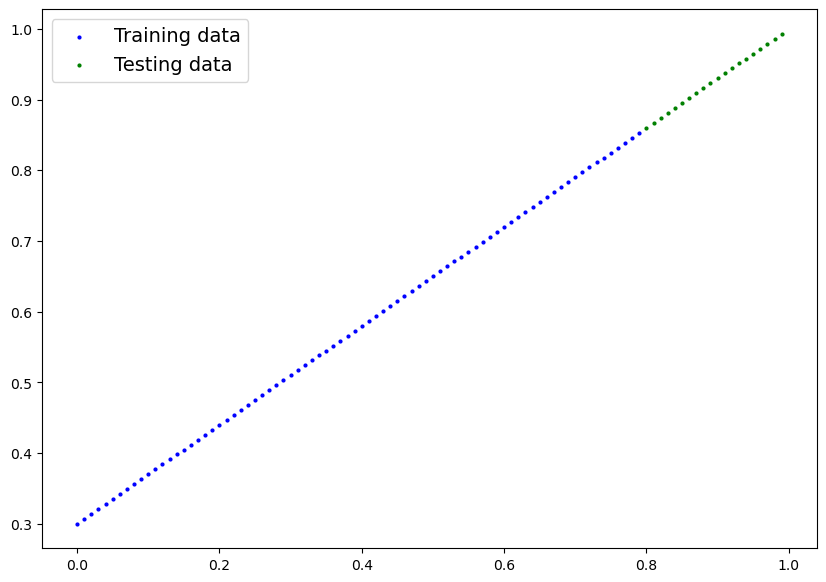

In [33]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [34]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [35]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr =0.1)

In [36]:
## train the model
torch.manual_seed(42)
## setting the no of epochs
epochs=5000


## put data  in GPU
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

## starting of the loop 
for epoch in range(epochs):
    ## training
    ## forward Pass
    y_pred = model_2(X_train_regression)
    
    ## calc loss
    loss = loss_fn(y_pred , y_train_regression)
    
    ##  set optimizer to zero
    optimizer.zero_grad()
    
    ## backprop
    loss.backward()
    
    ## updating the optimizer
    optimizer.step()
    
    ##  Testing phase
    model_2.eval()
    with torch.inference_mode():
        ## forward pass
        test_pred = model_2(X_test_regression)
        ## calc loss
        test_loss = loss_fn(test_pred, y_test_regression)
        
    ## print out the info
    if epoch%100==0:
        print(f"Epoch _{epoch}|| loss_{loss}")
    
    


Epoch _0|| loss_0.7598585486412048
Epoch _100|| loss_0.09308689832687378
Epoch _200|| loss_0.07375659793615341
Epoch _300|| loss_0.06745028495788574
Epoch _400|| loss_0.06106659397482872
Epoch _500|| loss_0.05698131397366524
Epoch _600|| loss_0.04856554791331291
Epoch _700|| loss_0.06108519062399864
Epoch _800|| loss_0.05599264055490494
Epoch _900|| loss_0.055710043758153915
Epoch _1000|| loss_0.06466341018676758
Epoch _1100|| loss_0.055176932364702225
Epoch _1200|| loss_0.07117106765508652
Epoch _1300|| loss_0.05286624655127525
Epoch _1400|| loss_0.07116233557462692
Epoch _1500|| loss_0.04987150803208351
Epoch _1600|| loss_0.04989383742213249
Epoch _1700|| loss_0.058457400649785995
Epoch _1800|| loss_0.052296943962574005
Epoch _1900|| loss_0.04445532709360123
Epoch _2000|| loss_0.052562516182661057
Epoch _2100|| loss_0.0414278469979763
Epoch _2200|| loss_0.05511927232146263
Epoch _2300|| loss_0.041483886539936066
Epoch _2400|| loss_0.047619450837373734
Epoch _2500|| loss_0.06762680411

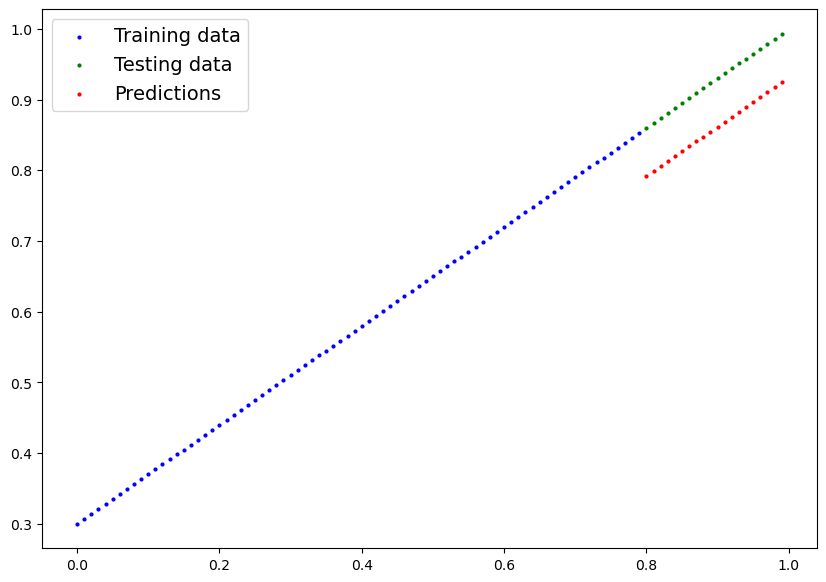

In [37]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

In [38]:
## well the losses are definitely going down
## So our model is still learning
## Key :: Start w/ smaller dataset and scale it up large
## Overfitting with smaller dataset -> scaling up with larger portion of data
## may turns out to be help[ful in reducing the overfitting


In [39]:
## The missing piece of the puzzle 
## The Non linearity
## WHY???????\
## Model is linear -> Learns the linear distribution of data
## unable to capture the pattern of the non linear data 
## which is non linear in nature
## So what to do next???
## modify the model structure
## Model so far we've made is/ can be linearly expressed
## So we Add Non-Linearity







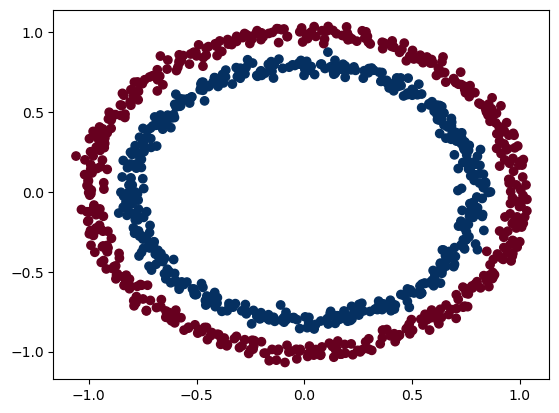

In [40]:
## Lets go back to Square 1
## and create the non linear data from the scratch
## make and plot 
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.RdBu)

In [41]:
#convert hte data i.e. tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split


## Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

## Split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [42]:
## Note So far the function used in NN is linear
## but the data is  non linear
## so we introduce the non linear function in NN
## one of the most common used non linear function is ReLU
## lets go
from torch import nn
class CircleModel_V2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features = 2 , out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10 , out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        ## relu between every linear layer
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    

In [43]:
model_3 = CircleModel_V2().to(device)
model_3

CircleModel_V2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [44]:
## lets setup our loss function
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)


In [45]:
## Training
torch.manual_seed(42)
epochs = 2000

## put all the target data into GPU
X_train , y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

## training loops
for epoch in range(epochs):
    ## train mode
    model_3.train()
    ## forward pass 
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    ## calc loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
    
    ## setting the optimizer grad to zero
    optimizer.zero_grad()
    
    ## backprop
    loss.backward()
    
    ## updating the optimizer
    optimizer.step()
    
    ## testing phase
    model_3.eval()
    
    with torch.inference_mode():
        ## forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        ## calc the loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)
    
    ## printing out the output
    if epoch%100==0:
        print(f"Epoch _{epoch}| loss_{loss}|| accuracy_{acc}")

Epoch _0| loss_0.6929463148117065|| accuracy_50.0
Epoch _100| loss_0.691152811050415|| accuracy_52.87500000000001
Epoch _200| loss_0.6897744536399841|| accuracy_53.37499999999999
Epoch _300| loss_0.6879494190216064|| accuracy_53.0
Epoch _400| loss_0.6851678490638733|| accuracy_52.75
Epoch _500| loss_0.6810224652290344|| accuracy_52.75
Epoch _600| loss_0.675148606300354|| accuracy_54.50000000000001
Epoch _700| loss_0.6665886044502258|| accuracy_58.375
Epoch _800| loss_0.6515955328941345|| accuracy_64.0
Epoch _900| loss_0.6236233115196228|| accuracy_74.0
Epoch _1000| loss_0.5681842565536499|| accuracy_87.75
Epoch _1100| loss_0.4815295338630676|| accuracy_93.5
Epoch _1200| loss_0.37056171894073486|| accuracy_97.75
Epoch _1300| loss_0.2545759081840515|| accuracy_99.0
Epoch _1400| loss_0.17179809510707855|| accuracy_99.5
Epoch _1500| loss_0.12187685072422028|| accuracy_99.625
Epoch _1600| loss_0.09122875332832336|| accuracy_99.875
Epoch _1700| loss_0.07100442051887512|| accuracy_99.875
Epoc

In [46]:
## WOOOH Holy Fucking  Shit What just happened...
## Accuracy  raked up faster than ISRO's latest rocket
## lets test iton test set 
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

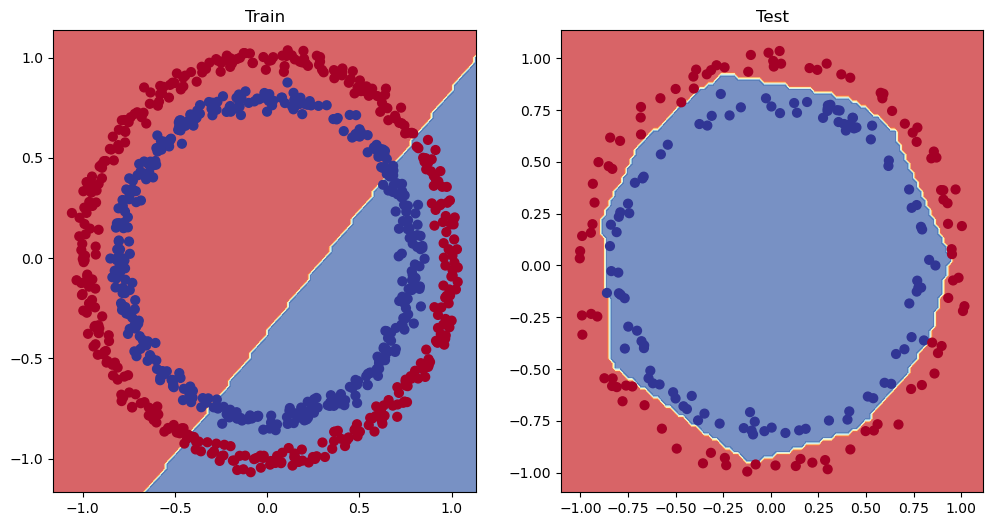

In [47]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

In [48]:
## kinda looks  overfiited but hey its still
## better than the linear model
## Fun_Fact:: Much of the data in the real world scenario
## is non linear in nature -> so make use of Non linearity of Neural Network


In [49]:
## lets get to the bottom of the ReLU....(or any other typical non linear function)
A = torch.arange(-10, 10,1, dtype = torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

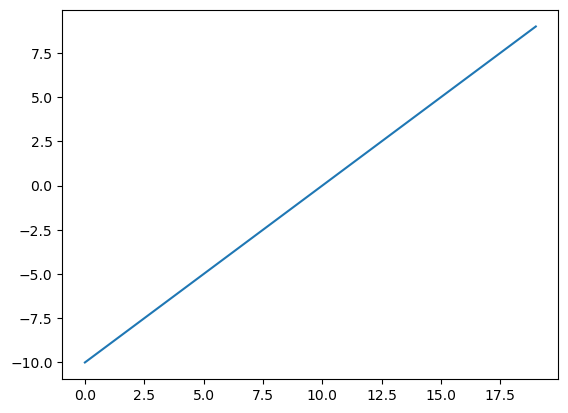

In [50]:
plt.plot(A)

In [51]:
## Lets hadcraft our own ReLU other than torch.nn.ReLU
def relu(x):
    return torch.maximum(torch.tensor(0),x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

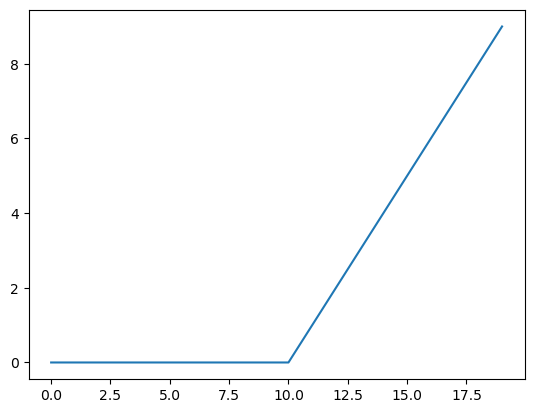

In [52]:
plt.plot(relu(A))

In [53]:
## and its time for custom sigmoid function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

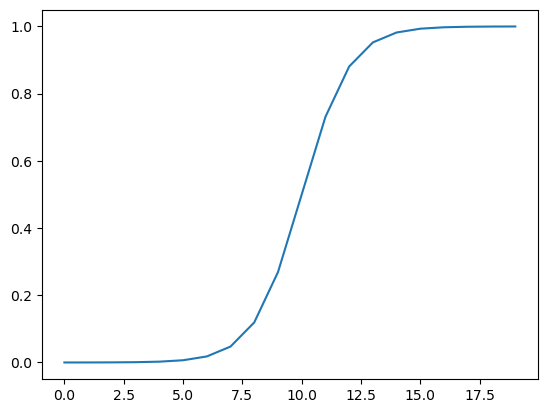

In [54]:
plt.plot(sigmoid(A))

tensor([[-3.3165,  8.0249],
        [-4.2907,  6.7420],
        [-3.0391,  9.0377],
        [-4.8253,  5.9217],
        [ 6.8232, -0.2246]]) tensor([2, 2, 2, 1, 0])


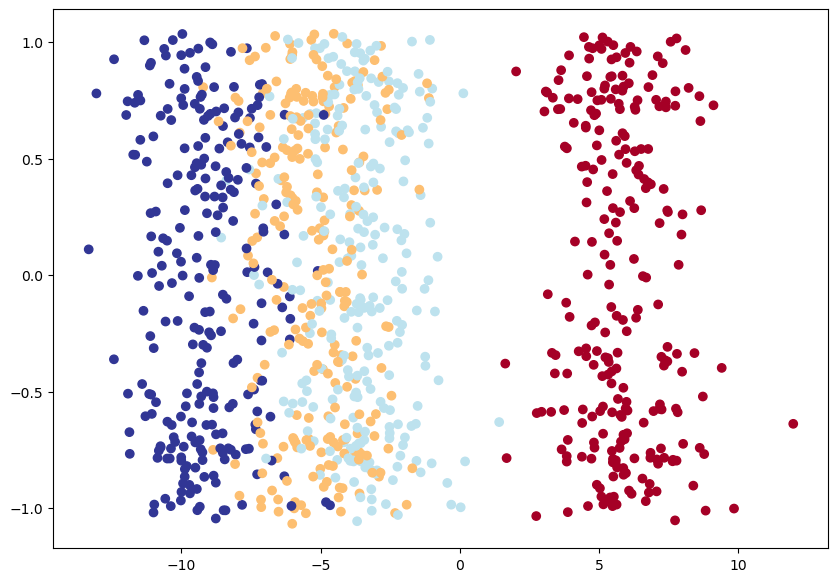

In [55]:
## now lets work on multi class classification data
## we'll leverage scikit learn make_blobs() method
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
## lets set some hyperparameter
Num_class = 4
num_features = 2
Random_Seed = 46

##  creating multi class data
X_blob, y_blob = make_blobs(n_samples=1000, n_features=
                           num_features,
                           centers = Num_class,
                           cluster_std = 1.5,
                           random_state= Random_Seed)

## turn data into tensors....
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

## split the data for test and training set
X_blob_train, X_blob_test, y_blob_train, y_blob_test= train_test_split(X_blob,
                                                                      y_blob,
                                                                      test_size =0.2,
                                                                      random_state = Random_Seed)
## plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X[:,1], c = y_blob, cmap=plt.cm.RdYlBu)


In [56]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units =8 ):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
        
            nn.Linear(in_features=input_features, out_features =hidden_units),
#             nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = hidden_units),
#             nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = output_features)
        
        )
        
    def forward(self,x):
        return self.linear_layer_stack(x)


In [57]:
## creating an instance of the model
model_4 = BlobModel(input_features = num_features,
                   output_features = Num_class,
                   hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [58]:
#create loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),lr =0.1)

In [59]:
## lets do a dry forward pass just to make sure everything is working fine
model_4(X_blob_train.to(device))[:5]

tensor([[ 1.0546, -0.9673,  1.0442,  1.3800],
        [ 0.2813, -1.2681,  0.1482,  0.9932],
        [ 0.5311, -1.0381,  0.4568,  1.0180],
        [ 3.2323,  0.2491,  3.6206,  2.1914],
        [ 0.2750, -1.5945,  0.0941,  1.2341]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [60]:
## and the number of elements in the sample predictions
model_4(X_blob_train.to(device))[0].shape, Num_class

(torch.Size([4]), 4)

In [61]:
## Sounds right outputing logits
## now then
## logits -> prediction_prob -> predictions[class]
## thats here the softmax will play its role
y_logits = model_4(X_blob_test.to(device))

## perform softmax calc on those logits
y_pred_probs = torch.softmax(y_logits, dim =1)
print(y_logits[:5])
print(y_pred_probs[:5])



tensor([[-1.3638, -0.3673, -1.5355, -0.9905],
        [-1.1674, -0.9051, -1.3966, -0.4295],
        [ 2.8364,  0.3168,  3.1938,  1.8263],
        [ 0.8876, -0.8390,  0.8786,  1.1510],
        [ 0.2787, -1.4371,  0.1209,  1.1184]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1666, 0.4512, 0.1403, 0.2420],
        [0.1928, 0.2506, 0.1533, 0.4033],
        [0.3479, 0.0280, 0.4974, 0.1267],
        [0.2882, 0.0513, 0.2856, 0.3750],
        [0.2299, 0.0413, 0.1964, 0.5324]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [62]:
## okaayyyyyy
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [63]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1666, 0.4512, 0.1403, 0.2420], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(1, device='cuda:0')


In [64]:
## lets train it
torch.manual_seed(42)
epochs = 100
## put data into GPU
X_blob_train , y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test , y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

## train 
for epoch in range(epochs):
    ## training
    model_4.train()
    ## forward pass
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim = 1)
    ##calc loss
    loss = loss_fn(y_logits, y_blob_train)
#     acc = accuracy_fn(y_true =y_blob_train, y_pred = y_pred)
    
    ## setting the optimizer to 0
    optimizer.zero_grad()
    
    ## backprop
    loss.backward()
    
    ## updating the optimizer
    optimizer.step()
    
    
    ## testing time
    model_4.eval()
    
    with torch.inference_mode():
        ## forward pass 
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim = 1).argmax(dim=1)
        ## calc losses and accuracy
        test_loss = loss_fn(test_logits,y_blob_test)
#         test_acc = accuracy_fn(y_true = y_blob_test, 
#                               y_pred = test_pred)
        
    ## printing out the necessary info
    
    if epoch%10==0:
        print(f" Epoch _{epoch}|| loss_{loss}|| accuracy_ {acc} || test_acc_{test_acc} ")
        

 Epoch _0|| loss_2.1038150787353516|| accuracy_ 99.875 || test_acc_100.0 
 Epoch _10|| loss_0.35789358615875244|| accuracy_ 99.875 || test_acc_100.0 
 Epoch _20|| loss_0.25406527519226074|| accuracy_ 99.875 || test_acc_100.0 
 Epoch _30|| loss_0.2172102928161621|| accuracy_ 99.875 || test_acc_100.0 
 Epoch _40|| loss_0.20109696686267853|| accuracy_ 99.875 || test_acc_100.0 
 Epoch _50|| loss_0.1926788091659546|| accuracy_ 99.875 || test_acc_100.0 
 Epoch _60|| loss_0.18755914270877838|| accuracy_ 99.875 || test_acc_100.0 
 Epoch _70|| loss_0.18405279517173767|| accuracy_ 99.875 || test_acc_100.0 
 Epoch _80|| loss_0.18143077194690704|| accuracy_ 99.875 || test_acc_100.0 
 Epoch _90|| loss_0.17934146523475647|| accuracy_ 99.875 || test_acc_100.0 


In [65]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  8.1914,  -7.8253,   0.1642, -15.2488],
        [  7.1121,  -5.8524,   2.9640, -18.9741],
        [-12.6686,  13.4069,  -0.7647,  27.3339],
        [ -3.1428,   4.9975,   3.8495,  -0.8340],
        [ -0.2092,   2.7771,   6.4737, -12.0134],
        [ -3.6115,   5.8262,   4.9740,  -2.2615],
        [  7.8902,  -7.2822,   0.9212, -16.2378],
        [ -1.3617,   4.1990,   7.2330, -11.3483],
        [-12.4185,  13.9151,   1.7311,  21.6511],
        [ -6.8098,   9.3250,   5.6245,   2.6166]], device='cuda:0')

In [66]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([0, 0, 3, 1, 2, 1, 0, 2, 3, 1], device='cuda:0')
Labels: tensor([0, 0, 3, 1, 2, 2, 0, 2, 3, 1], device='cuda:0')
Test accuracy: 93.0%


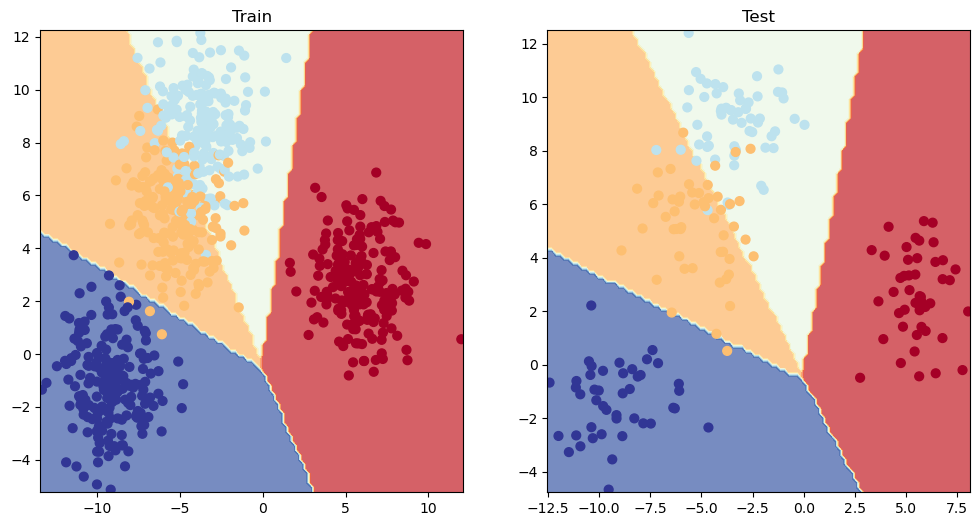

In [67]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [68]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

tensor(0.9300, device='cuda:0')